# Homework 1: Problems
### PHYS T480/580, Fall 2018
https://github.com/gtrichards/PHYS_T480_F18/


## Problem 1

Practice your git and github skills by submitting this homework via github:

* Clone the class github repository to your computer, the one at https://github.com/gtrichards/PHYS_T480_F18/  (should already have done this).
* Click the Github Classroom link you received via the mailing list. This will create a private github repository through which you'll be submitting your homeworks. Clone that repository to your computer.
* Copy this notebook from the class github repository to your private homework submission repository. IMPORTANT: rename it to `<filename>-FirstLast.ipynb` once you copy it, where `<filename>` is the existing filename and `FirstLast` are your first and last name. Example: `PHYST480-F18-HW1-GordonRichards.ipynb`.
* Solve problems #2, #3, and #4 by filling in the missing cells in the copied notebook.
* Commit the notebook to your repository, and `git push` it upstream.


## Problem 2
Generate a sample of 10,000 data values drawn from N($\mu$=1.0, $\sigma$=0.2) and
draw a pretty histogram, with the bin size determined using the Freedman-Diaconis
rule. Overplot the true distribution. 

## Problem 3
Repeat the problem 2, but now add to the Gaussian sample (concatenate arrays with `np.concatenate()`) 
another sample of 10,000 data values drawn from a `cauchy` distribution with
$\mu=2.0$ and $\gamma=0.5$. Do it twice: once with the bin size determined 
using the Freedman-Diaconis rule and once using the Scott's rule. Comment. 


## Problem 4
Follow the example from the Central Limit Theorem cells in BasicStats2.ipynb and simulate the distribution of 1,000,000 $\mathscr{N}(0,1)$ draws of $\chi^2$ for `N=2` and `N=5`.  Overplot the theoretical pdf (it will help to use `scipy.special.gamma()`).

### Some useful definitions and functions

In [2]:
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize
from scipy.stats import cauchy, norm
from scipy.special import gamma
from astroML.plotting import setup_text_plots
from astroML.stats import sigmaG
from astroML.plotting import hist as fancyhist
setup_text_plots(fontsize=14, usetex=False)
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

## Problem 2 Solution

[-6.57481652 -5.64579649 -4.71677645 -3.78775641 -2.85873637 -1.92971634
 -1.0006963  -0.07167626  0.85734377  1.78636381  2.71538385  3.64440388
  4.57342392  5.50244396  6.43146399  7.36048403  8.28950407  8.35127604]


Text(0.5,0,'x')

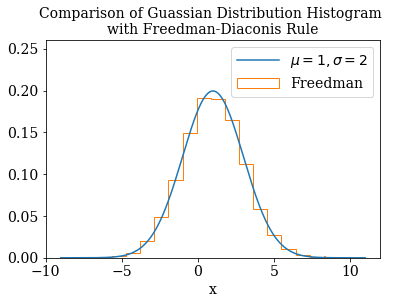

In [177]:
mu = 1 #mean of distribution
std = 2 #standard deviation of distribution
N = 10000

x = np.linspace(-9,11,num=N) #create x data for plot of probability density function
dist = norm(mu,std) #distribution definition
draws = dist.rvs(N) #draw N random values from distribution
#print(draws)

plt.plot(x,dist.pdf(x), label = "$\mu = %i, \sigma = %i$" % (mu,std)) #plot probability density function

#fancyhist(draws,bins='freedman',histtype="step",density=True) #print histogram of draws but freedman bin types gives error.  
#Scott bin types do not throw error in above line.

#going to do it manually like in HistogramExample.ipynb notebook
sigmaG2 = sigmaG(x) #calculate sigma_G the easy way
binwidth = (2.7*sigmaG2)/(N**(1/3)) #calculate the bin width
#print(binwidth)
bins = np.append(np.arange(start=draws.min(),stop=draws.max(),step=binwidth),draws.max()) #create array of bin limits
print(bins)
plt.hist(draws,histtype="step",density=True,bins=bins,label="Freedman") #prints a normal histogram with matplotlib with Freedman bin conditions

#plot decorations
plt.title("Comparison of Guassian Distribution Histogram \nwith Freedman-Diaconis Rule")
plt.legend(loc='best') #put the legend in a specific location
plt.ylim(0,.26) #add some room for the legend
plt.xlabel("x")


## Problem 3 Solution

3562.6752536492754


(0, 0.8)

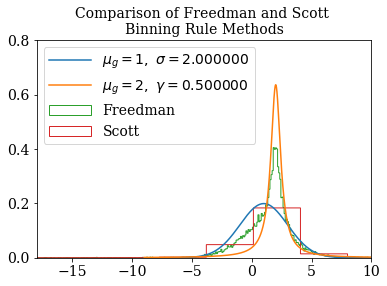

In [189]:
mu_g = 2
gamma = .5

dist_g = cauchy(mu_g,gamma)
draws_g = dist_g.rvs(N) #draw N random numbers from gamma distribution

total_sample = np.concatenate((draws,draws_g)) #add those to the original N drawn from Gaussian
#IF THERE IS AN ERROR HERE, execute the first cell again.

plt.plot(x,dist.pdf(x),label = "$\mu_g = %i,\ \sigma = %f$" % (mu,std))
plt.plot(x,dist_g.pdf(x),label = "$\mu_g = %i,\ \gamma = %f$" % (mu_g,gamma))

#*************************************************************************************************************
#plot histogram with freedman bin conditions
sigmaG3 = sigmaG(total_sample) #calculate sigma_G the easy way
#print(sigmaG3)
binwidth = (2.7*sigmaG3)/(2*N**(1/3)) #calculate the bin width
#print(binwidth)
bins2 = np.append(np.arange(start=total_sample.min(),stop=total_sample.max(),step=binwidth),total_sample.max()) #create array of bin limits
#print(bins2)
plt.hist(total_sample,histtype="step",density=True,bins=bins2,label="Freedman")

#**************************************************************************************************************
#plot histogram with scott bin conditions
fancyhist(total_sample, bins="scott", histtype="step",density=True,label="Scott")

"""
Scott bin conditions seem to fit the new set of draws much worse than the Freedman does.
Not sure if this is correct.  Seems correct based on the description in HistogramExample.ipynb
that Freedman is for a sample without an established standard deviation and may not fit into
a gaussian distribution family.

The addition of the sample should increase the standard deviation of the sample which should
also increase bin width, lowering the number of bins.
"""

#plot decorations
plt.title("Comparison of Freedman and Scott \nBinning Rule Methods")
plt.legend(loc=2)
plt.xlim(-18,10)
plt.ylim(0,.8)




## Problem 4 Solution

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #clear, please run `%reset?` for details
Don't know how to reset  cache, please run `%reset?` for details
Don't know how to reset  to, please run `%reset?` for details
Don't know how to reset  free, please run `%reset?` for details
Don't know how to reset  up, please run `%reset?` for details
Don't know how to reset  memory, please run `%reset?` for details


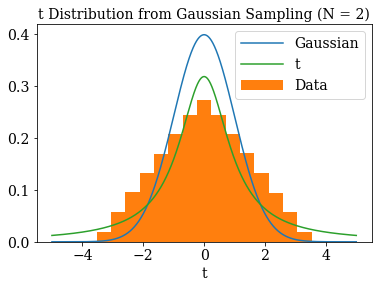

In [4]:
%reset #clear cache to free up memory
#For 2 Draws first
N=2 # Number of draws
mu= 0 # Location
sigma = 1.0 # Sqrt(N) properly normalizes the pdf
draws = 1000000 #NOTE: If I run this multiple times in a row get a memory error

u = np.linspace(-5,5,draws) # Array to sample the space
dist = norm(mu,sigma) #normal distribution
plt.plot(u,dist.pdf(u),label='Gaussian') #plot gaussian for comparison

y = []
for i in range(draws):
    x = (5*np.random.random(N))-2.5 # Two random draws
    y.append(np.average(x)) #add average to two random draws to list

y = np.array(y)
y = (y-mu)*np.sqrt(N)/sigma #perform the t value transformation for the mean and std of the gaussian
    
plt.hist(y,bins=15,density = True,histtype='stepfilled',label='Data') #make histogram of t value

def calc(x):
    k = N-1 #degrees of freedom
    return (gamma((k+1)/2))/(np.sqrt(k*math.pi)*gamma(k/2))*(1+((x*x)/k))**(-(k+1)/2) #function for t distribution
plt.plot(u,calc(u),label='t') #plot the t distribution

"""
Note that the data is now wider than the gaussian and shorter in peak.
"""

#plot decoration
plt.title("t Distribution from Gaussian Sampling (N = 2)")
plt.xlabel("t")
plt.legend(loc='best')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Don't know how to reset  #delete, please run `%reset?` for details
Don't know how to reset  cache, please run `%reset?` for details
Don't know how to reset  to, please run `%reset?` for details
Don't know how to reset  free, please run `%reset?` for details
Don't know how to reset  memory, please run `%reset?` for details


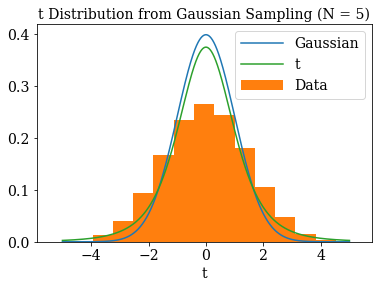

In [5]:
%reset #delete cache to free memory
N=5 # Number of draws
mu= 0 # Location
sigma = 1.0 # Sqrt(N) properly normalizes the pdf
draws = 1000000 #NOTE: If this gets run multiple times in a row still run into memory error

u = np.linspace(-5,5,draws) # Array to sample the space
dist = norm(mu,sigma) #normal distribution
plt.plot(u,dist.pdf(u),label='Gaussian') #plot gaussian for comparison

y = []
for i in range(draws):
    x = (5*np.random.random(N))-2.5 # Two random draws
    y.append(np.average(x)) #add average to two random draws to list

y = np.array(y)
y = (y-mu)*np.sqrt(N)/sigma #perform the t value transformation for the mean and std of the gaussian
    
plt.hist(y,bins=15,density = True,histtype='stepfilled',label='Data') #make histogram of t value

def calc(x):
    k = N-1 #degrees of freedom
    return (gamma((k+1)/2))/(np.sqrt(k*math.pi)*gamma(k/2))*(1+((x*x)/k))**(-(k+1)/2) #function for t distribution
plt.plot(u,calc(u),label='t') #plot the t distribution

"""
As N grows, it seems that the distribution (both the data and distribution) approach a gaussian distribution again.
"""


#plot decoration
plt.title("t Distribution from Gaussian Sampling (N = 5)")
plt.xlabel("t")
plt.legend(loc='best')